In [1]:
# paths
workspace = '/Users/brian/code/zv/zv'

# It appears that installation of GDAL somehow breaks shapely,
# leading to Geometry errors like:
# Shell is not a LinearRing
# ValueError: Null geometry supports no operations
# /Library/Frameworks/Python.framework/Versions/3.6/bin/python3.6 -m pip install --upgrade --no-deps --force-reinstall fiona

import sys
#!{sys.executable} -m pip install wget
# !{sys.executable} -m pip install fiona
# !{sys.executable} -m pip install shapely
# !{sys.executable} -m pip install geopandas

In [2]:
import time
import json
import pprint as pp

from IPython.display import display, Markdown, Latex
#display(Markdown('*some markdown* $\phi$'))

import pandas as pd
from IPython.display import display, HTML

from shapely.geometry import box
import shapely.geometry

from gbdxtools import Interface
gbdx = Interface()

from gbdxtools.task import env
from gbdxtools import CatalogImage, WV03_VNIR, WV03_SWIR  

%matplotlib inline

In [15]:
# This is an IMAGE search

#Flying Fox road
wkt_string="POLYGON ((153.12975883483887 -28.13111173310014, 153.24236869812012 -28.13111173310014, 153.24236869812012 -28.053424036910094, 153.12975883483887 -28.053424036910094, 153.12975883483887 -28.13111173310014))"

# Rainforest 
#wkt_string="POLYGON((153.1607437133789 -28.231658610399908, 153.14151763916016 -28.17750063139443, 153.03405761718747 -28.21638218442873, 153.06804656982422 -28.265228811164185, 153.1607437133789 -28.231658610399908))"

# Aus. Coast
#wkt_string = "POLYGON((153.58 -31.74, 133.66 -26.46, 142.49 -10.69, 142.49 -10.69, 153.84 -25.44, 153.58 -31.74))"

# "WV03_VNIR"
#types = [ "LandsatAcquisition" ]
types = [ "DigitalGlobeAcquisition" ]


cresults = gbdx.catalog.search(searchAreaWkt=wkt_string,
                          startDate="2016-08-16T00:00:00.000Z",
                          endDate="2018-08-16T00:00:00.000Z",
                          types=types)

len(cresults)

156

In [16]:
v =pd.io.json.json_normalize(cresults)
#display(v)

In [5]:
#list(v)

['identifier',
 'properties.browseURL',
 'properties.catalogID',
 'properties.cloudCover',
 'properties.footprintWkt',
 'properties.imageBands',
 'properties.multiResolution',
 'properties.multiResolution_end',
 'properties.multiResolution_max',
 'properties.multiResolution_min',
 'properties.multiResolution_start',
 'properties.offNadirAngle',
 'properties.offNadirAngle_end',
 'properties.offNadirAngle_max',
 'properties.offNadirAngle_min',
 'properties.offNadirAngle_start',
 'properties.panResolution',
 'properties.panResolution_end',
 'properties.panResolution_max',
 'properties.panResolution_min',
 'properties.panResolution_start',
 'properties.platformName',
 'properties.scanDirection',
 'properties.sensorPlatformName',
 'properties.stereoPair',
 'properties.sunAzimuth',
 'properties.sunAzimuth_max',
 'properties.sunAzimuth_min',
 'properties.sunElevation',
 'properties.sunElevation_max',
 'properties.sunElevation_min',
 'properties.targetAzimuth',
 'properties.targetAzimuth_end',

In [17]:
display(v[['properties.cloudCover','properties.sensorPlatformName','properties.timestamp','properties.browseURL',
 'properties.catalogID']])

properties.cloudCover properties.sensorPlatformName  \
0                       39              WORLDVIEW03_VNIR   
1                       17              WORLDVIEW03_VNIR   
2                        0              WORLDVIEW03_VNIR   
3                        0              WORLDVIEW03_VNIR   
4                        0              WORLDVIEW03_SWIR   
5                        0              WORLDVIEW03_SWIR   
6                        0              WORLDVIEW03_SWIR   
7                       75                   WORLDVIEW02   
8                       67                   WORLDVIEW02   
9                       15                      GEOEYE01   
10                      41                   WORLDVIEW01   
11                       2              WORLDVIEW03_VNIR   
12                       0                   WORLDVIEW01   
13                      62              WORLDVIEW03_VNIR   
14                       0                   WORLDVIEW02   
15                      23                      GEOEYE01   
16                       2                   WORLDVIEW01   
17                       7                   WORLDVIEW01   
18                      13                   WORLDVIEW01   
19                       0              WORLDVIEW03_SWIR   
20                      52                   WORLDVIEW02   
21                      49                   WORLDVIEW02   
22                     100                   WORLDVIEW02   
23                      90              WORLDVIEW03_VNIR   
24                     100                   WORLDVIEW01   
25                       0              WORLDVIEW03_SWIR   
26                      91              WORLDVIEW03_VNIR   
27                     100                      GEOEYE01   
28                      97              WORLDVIEW03_VNIR   
29                     100                   WORLDVIEW02   
..                     ...                           ...   
126                     83                   WORLDVIEW01   
127                     84                   WORLDVIEW01   
128                     72                   WORLDVIEW01   
129                     87                   WORLDVIEW01   
130                      5              WORLDVIEW03_VNIR   
131                     90                   WORLDVIEW02   
132                     49                   WORLDVIEW02   
133                      0                      GEOEYE01   
134                     12                   WORLDVIEW01   
135                     59              WORLDVIEW03_VNIR   
136                     72                   WORLDVIEW02   
137                     22                   WORLDVIEW01   
138                      0                   WORLDVIEW02   
139                      8                   WORLDVIEW02   
140                     18                      GEOEYE01   
141                     23              WORLDVIEW03_VNIR   
142                     80                   WORLDVIEW01   
143                      2                      GEOEYE01   
144                     26                   WORLDVIEW01   
145                      1              WORLDVIEW03_SWIR   
146                      0                   WORLDVIEW02   
147                      7                   WORLDVIEW02   
148                      2              WORLDVIEW03_VNIR   
149                      0                   WORLDVIEW02   
150                     24                   WORLDVIEW01   
151                      2              WORLDVIEW03_VNIR   
152                     81              WORLDVIEW03_SWIR   
153                      0              WORLDVIEW03_SWIR   
154                      2              WORLDVIEW03_SWIR   
155                     31              WORLDVIEW03_SWIR   

         properties.timestamp  \
0    2018-06-26T00:20:34.000Z   
1    2018-07-27T00:15:21.000Z   
2    2018-07-08T00:12:39.000Z   
3    2018-07-08T00:13:08.000Z   
4    2018-07-08T00:12:39.000Z   
5    2018-07-08T00:13:08.000Z   
6    2018-06-26T00:20:34.000Z   
7    2018-04-05T23:5

In [18]:
display(v[['properties.sensorPlatformName','properties.timestamp','properties.catalogID']])

properties.sensorPlatformName      properties.timestamp  \
0                WORLDVIEW03_VNIR  2018-06-26T00:20:34.000Z   
1                WORLDVIEW03_VNIR  2018-07-27T00:15:21.000Z   
2                WORLDVIEW03_VNIR  2018-07-08T00:12:39.000Z   
3                WORLDVIEW03_VNIR  2018-07-08T00:13:08.000Z   
4                WORLDVIEW03_SWIR  2018-07-08T00:12:39.000Z   
5                WORLDVIEW03_SWIR  2018-07-08T00:13:08.000Z   
6                WORLDVIEW03_SWIR  2018-06-26T00:20:34.000Z   
7                     WORLDVIEW02  2018-04-05T23:57:22.000Z   
8                     WORLDVIEW02  2018-04-05T23:58:49.000Z   
9                        GEOEYE01  2018-01-05T23:45:40.000Z   
10                    WORLDVIEW01  2018-01-02T02:42:07.000Z   
11               WORLDVIEW03_VNIR  2018-01-07T00:10:27.000Z   
12                    WORLDVIEW01  2018-01-09T03:16:03.000Z   
13               WORLDVIEW03_VNIR  2018-02-08T00:20:55.000Z   
14                    WORLDVIEW02  2018-01-17T00:00:16.000Z   
15                       GEOEYE01  2018-02-04T23:44:34.000Z   
16                    WORLDVIEW01  2018-01-06T02:47:08.000Z   
17                    WORLDVIEW01  2018-01-10T02:52:18.000Z   
18                    WORLDVIEW01  2018-01-31T02:57:55.000Z   
19               WORLDVIEW03_SWIR  2018-02-01T00:10:05.000Z   
20                    WORLDVIEW02  2018-02-13T00:08:49.000Z   
21                    WORLDVIEW02  2018-02-13T00:09:29.000Z   
22                    WORLDVIEW02  2018-02-02T23:36:55.000Z   
23               WORLDVIEW03_VNIR  2018-03-11T00:16:38.000Z   
24                    WORLDVIEW01  2018-03-06T03:01:44.000Z   
25               WORLDVIEW03_SWIR  2018-02-20T00:13:32.000Z   
26               WORLDVIEW03_VNIR  2018-02-20T00:13:32.000Z   
27                       GEOEYE01  2018-02-01T23:34:25.000Z   
28               WORLDVIEW03_VNIR  2018-02-01T00:10:05.000Z   
29                    WORLDVIEW02  2018-02-02T23:37:08.000Z   
..                            ...                       ...   
126                   WORLDVIEW01  2017-03-26T03:05:13.882Z   
127                   WORLDVIEW01  2017-04-04T02:53:23.110Z   
128                   WORLDVIEW01  2017-03-26T03:06:03.081Z   
129                   WORLDVIEW01  2017-04-21T02:56:21.000Z   
130              WORLDVIEW03_VNIR  2017-12-30T23:57:31.000Z   
131                   WORLDVIEW02  2017-04-04T00:09:15.781Z   
132                   WORLDVIEW02  2017-01-02T00:05:37.576Z   
133                      GEOEYE01  2017-03-10T00:01:41.085Z   
134                   WORLDVIEW01  2017-03-01T02:54:39.742Z   
135              WORLDVIEW03_VNIR  2017-04-08T00:12:34.859Z   
136                   WORLDVIEW02  2017-03-24T00:15:17.665Z   
137                   WORLDVIEW01  2017-01-26T02:52:43.751Z   
138                   WORLDVIEW02  2017-02-17T00:07:36.443Z   
139                   WORLDVIEW02  2017-04-06T23:58:58.836Z   
140                      GEOEYE01  2017-02-04T23:48:57.485Z   
141              WORLDVIEW03_VNIR  2017-10-24T00:10:10.000Z   
142                   WORLDVIEW01  2017-04-21T02:55:21.000Z   
143                      GEOEYE01  2017-03-10T00:02:51.085Z   
144                   WORLDVIEW01  2016-09-24T02:52:59.538Z   
145              WORLDVIEW03_SWIR  2016-11-11T00:23:43.017Z   
146                   WORLDVIEW02  2016-10-04T23:51:09.474Z   
147                   WORLDVIEW02  2016-10-15T23:45:18.240Z   
148              WORLDVIEW03_VNIR  2016-11-11T00:23:42.164Z   
149                   WORLDVIEW02  2016-10-04T23:52:24.824Z   
150                   WORLDVIEW01  2016-09-24T02:53:39.693Z   
151              WORLDVIEW03_VNIR  2016-09-22T00:14:32.316Z   
152              WORLDVIEW03_SWIR  2016-11-17T00:20:59.162Z   
153              WORLDVIEW03_SWIR  2016-11-29T00:15:09.449Z   
154              WORLDVIEW03_SWIR  2016-09-22T00:14:33.171Z   
155              WORLDVIEW03_SWIR  2016-08-16T00:14:48.725Z   

    properties.catalogID  
0       104001003F103400  
1       104001003FC6C400  
2       10400100

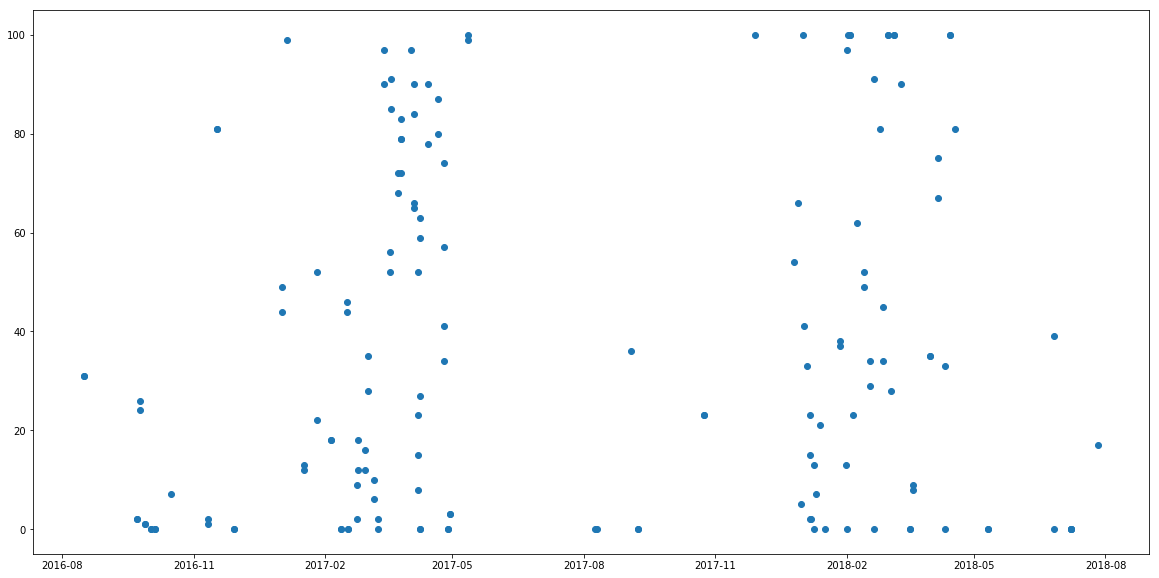

In [19]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#plt.plot(x=v[['properties.timestamp']],y=v[['properties.cloudCover']])
#v[['properties.timestamp']]
#plt.plot_date(x=days, y=impressions)
cc = v[['properties.cloudCover']]
ts = v[['properties.timestamp']]

plt.figure(figsize=(20, 10))
plt.plot_date(x=ts,y=cc)

In [8]:

#import wget

#print('Beginning file download with wget module')

#url = v.at[8,'properties.browseURL']
#wget.download(url, '/Users/brian/code/zv/zv/' + v.at[8,'properties.catalogID'] + '.jpeg')  

In [27]:
pp.pprint(cresults[3])

{'identifier': '104001003EAC0500',
 'properties': {'browseURL': 'https://api.discover.digitalglobe.com/show?id=104001003EAC0500&f=jpeg',
                'catalogID': '104001003EAC0500',
                'cloudCover': 0,
                'footprintWkt': 'MULTIPOLYGON(((153.0834069 -27.04007771, '
                                '153.2423343 -27.05735615, 153.2423092 '
                                '-27.09070434, 153.242277 -27.12404789, '
                                '153.2422344 -27.1573831, 153.2421752 '
                                '-27.1906877, 153.242108 -27.2239138, '
                                '153.2420674 -27.25713589, 153.2420328 '
                                '-27.29036576, 153.241981 -27.3235654, '
                                '153.2419153 -27.35673439, 153.2418595 '
                                '-27.38988773, 153.2418053 -27.42301583, '
                                '153.2417623 -27.45613205, 153.241743 '
                                '-27.48926513, 1

In [34]:
wv3vnir = cresults[3]["properties"]["footprintWkt"]
wv3swir = cresults[5]["properties"]["footprintWkt"]

In [28]:
pp.pprint(cresults[5])

{'identifier': '104A01003EAC0500',
 'properties': {'browseURL': 'https://api.discover.digitalglobe.com/show?id=104A01003EAC0500&f=jpeg',
                'catalogID': '104A01003EAC0500',
                'cloudCover': 0,
                'footprintWkt': 'MULTIPOLYGON(((153.0973067 -26.96902434, '
                                '153.2257582 -26.98402056, 153.2257376 '
                                '-27.02411242, 153.2257065 -27.06419654, '
                                '153.2256496 -27.10424237, 153.2255806 '
                                '-27.14418075, 153.2255489 -27.18412753, '
                                '153.2255111 -27.22406204, 153.2254457 '
                                '-27.26394529, 153.2253875 -27.30380123, '
                                '153.2253404 -27.34363039, 153.225297 '
                                '-27.38343341, 153.2252524 -27.42322443, '
                                '153.2252097 -27.46297021, 153.225241 '
                                '-27.50276

In [ ]:
def getlink(r,v):
    rstr = ''
    if v.at[r,'properties.sensorPlatformName'] == 'WORLDVIEW03_VNIR':
        cid = str(v.at[r,'properties.catalogID'])
        cc = str(v.at[r,'properties.cloudCover'])
        turl = str(v.at[r,'properties.browseURL'])
        ts = str(v.at[r,'properties.timestamp'])
        rstr = '['+ cid + ' ' + cc + ' ' + ts +'](' + turl +")" 
    return rstr
 
b = [getlink(n,v) for n in range(len(cresults))]
    
bstr = '\n'.join(b)    
#display(Markdown(bstr))



In [7]:
# ordering VNIR
cat_ids = ['104001003EAC0500']
order_id = gbdx.ordering.order(cat_ids)
print(order_id)

#4	0	WORLDVIEW03_VNIR	2018-07-08T00:13:08.000Z	https://api.discover.digitalglobe.com/show?id=...	104001003EAC0500
#5	0	WORLDVIEW03_SWIR	2018-07-08T00:13:08.000Z	https://api.discover.digitalglobe.com/show?id=...	104A01003EAC0500
              

2abb01fe-426c-464f-9e24-dd997405835f


In [8]:
order_status = gbdx.ordering.status(order_id)
pp.pprint(order_status)

[{'acquisition_id': '104001003EAC0500',
  'location': 'not_delivered',
  'state': 'submitted'}]


In [13]:
order_status = gbdx.ordering.status(order_id)
pp.pprint(order_status)

[{'acquisition_id': '104001003EAC0500',
  'location': 'not_delivered',
  'state': 'ordering'}]


In [14]:
order_status = gbdx.ordering.status(order_id)
pp.pprint(order_status)

[{'acquisition_id': '104001003EAC0500',
  'location': 'not_delivered',
  'state': 'placed'}]


In [27]:
order_status = gbdx.ordering.status(order_id)
pp.pprint(order_status)

[{'acquisition_id': '104001003EAC0500',
  'location': 's3://receiving-dgcs-tdgplatform-com/058330011010_01_003',
  'state': 'delivered'}]


In [5]:
order_status = gbdx.ordering.status('2abb01fe-426c-464f-9e24-dd997405835f')
pp.pprint(order_status)

[{'acquisition_id': '104001003EAC0500',
  'location': 's3://receiving-dgcs-tdgplatform-com/058330011010_01_003',
  'state': 'delivered'}]


# Order States

[https://gbdxdocs.digitalglobe.com/docs/ordering-course-v2](https://gbdxdocs.digitalglobe.com/docs/ordering-course-v2)

## Orders can have the following states:

| Order Status | Description |
|--------------|-------------|
| submitted | The order has been submitted to the GBDX platform |
| ordering | The Acquisition IDs are being ordered from the DigitalGlobe (DG) factory |
| placed | The order has been placed with the DG factory | 
| delivered | The Acquisition ID has been delivered from the DG factory and is available |
|failed | The order failed.

In [5]:
#catalog_id = env.inputs.get('catalog_id','104001003EAC0500')
#  bbox must be in the form of: minx, miny, maxx, maxy
#(or rather left, lower, right, upper) and be in EPSG:4326 coordinates

#bb = [153.1298, -28.13111, 153.2424, -28.05342]
bb = [153.00234,-28.093722,153.259317,-27.986452]

#153.105469,-28.107137],[153.239078,-28.107137],[153.239078,-28.035471],[153.105469,-28.035471],[153.105469,-28.107137]]

bb = [153.105469,-28.035471,153.239078,-28.107137]


img = CatalogImage('104001003EAC0500', bbox=bb)
#img.plot()

# or call read directly to get a numpy array:
#nd_array = img.read()
#print(nd_array.shape)

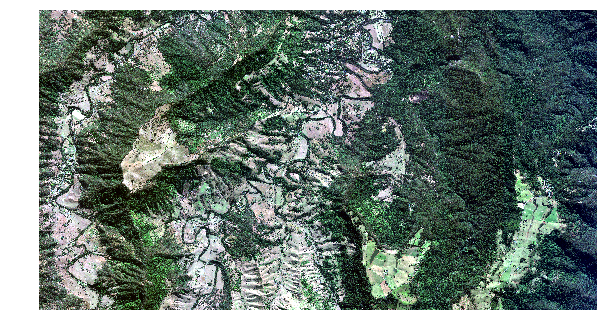

In [6]:
img.plot()

In [7]:
nda = img.read()
print(nda.shape)

(8, 5529, 10307)


In [8]:
# Small function to plot figures with colorbars:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def mplot(image, w=15, h=12, cmap='jet'):
    f, ax = plt.subplots(1, figsize=(w,h))
    ax.axis('off')
    plt.imshow(image, cmap=cmap)
    plt.colorbar()
    plt.show()

In [9]:
# gbdx.s3.info # Will print secret key

In [7]:
data = "s3://receiving-dgcs-tdgplatform-com/058330011010_01_003" # Flying Fox Road
aoptask = gbdx.Task("AOP_Strip_Processor", data=data, enable_acomp=True, enable_pansharpen=True)
workflow = gbdx.Workflow([ aoptask ])
workflow.savedata(aoptask.outputs.data, location='GoldCoast')
workflow.execute()

'4933824227434189438'

In [8]:
workflow.status

{'event': 'scheduled', 'state': 'pending'}

In [3]:
# So maybe notebook crashes while workflow is running.  We can recover it with 
workflow = gbdx.Workflow( [] )  # instantiate a blank workflow
workflow.id = '4933824227434189438'

In [9]:
workflow.status

{'event': 'succeeded', 'state': 'complete'}

In [19]:
# odering SWIR
cat_ids = ['104A01003EAC0500']
order_id = gbdx.ordering.order(cat_ids)
print(order_id)

ff67bee8-a140-4f0e-ae0b-da633b5346e4


In [20]:
order_status = gbdx.ordering.status(order_id)
pp.pprint(order_status)

[{'acquisition_id': '104A01003EAC0500',
  'location': 's3://receiving-dgcs-tdgplatform-com/058255420010_01_003',
  'state': 'delivered'}]


In [21]:
bb = [153.105469,-28.035471,153.239078,-28.107137]
img_swir = CatalogImage('104A01003EAC0500', bbox=bb)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gbdxtools/images/meta.py:440: UserWarning: Image does not contain specified geometry (153.105469, -28.107137, 153.239078, -28.035471) not in (153.09762104342795, -28.243627935598276, 153.22548206570607, -26.96952719)
  warnings.warn(ae.args)


In [23]:
from osgeo import ogr

# wkt1 = wv3swir
# wkt2 = wv3vnir

# poly1 = ogr.CreateGeometryFromWkt(wkt1)
# poly2 = ogr.CreateGeometryFromWkt(wkt2)

# intersection = poly1.Intersection(poly2)

# print(intersection.ExportToWkt())


In [41]:
intersection

<osgeo.ogr.Geometry; proxy of <Swig Object of type 'OGRGeometryShadow *' at 0x11eee1d80> >

In [47]:
olp = shapely.geometry.base.geom_from_wkt(intersection.ExportToWkt())

In [48]:
olp.bounds

(153.097428984394, -28.24407693, 153.2258636, -27.0416021780519)

In [50]:
CatalogImage('104A01003EAC0500').bounds

(153.09762104342795, -28.243627935598276, 153.22548206570607, -26.96952719)

In [51]:
CatalogImage('104001003EAC0500').bounds

(153.08321592, -28.379511108505213, 153.2423581316421, -27.040393627369745)

In [59]:
# these are bounds, not WKT

from osgeo import ogr

b = "POLYGON ((153.08321592 -28.379511108505213, 153.2423581316421 -27.040393627369745))"
a = "POLYGON (())"

poly1 = ogr.CreateGeometryFromWkt(a)
poly2 = ogr.CreateGeometryFromWkt(b)

intersectionb = poly1.Intersection(poly2)
#olp = shapely.geometry.base.geom_from_wkt(intersection.ExportToWkt())
#olp.bounds


In [67]:
 
a = box(153.09762104342795, -28.243627935598276, 153.22548206570607, -26.96952719)
b = box(153.08321592, -28.379511108505213, 153.2423581316421, -27.040393627369745)
# The intersection
#a.intersection(b).area
print(a.intersection(b).bounds)

(153.09762104342795, -28.243627935598276, 153.22548206570607, -27.040393627369745)


In [68]:
bb = [153.09762104342795, -28.243627935598276, 153.22548206570607, -27.040393627369745]
img_swir = CatalogImage('104A01003EAC0500', bbox=bb)

In [8]:
bb = [153.09762104342795, -28.243627935598276, 153.22548206570607, -27.040393627369745]
img_vnir = CatalogImage('104001003EAC0500', bbox=bb)

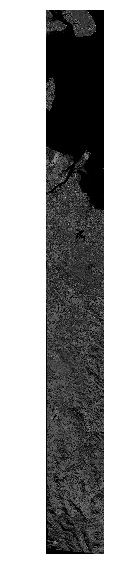

In [70]:
img_swir.plot()

In [64]:
#bb = [153.09762104342795, -28.243627935598276, 153.22548206570607, -28.040393627369745]
bb = [153.09762104342795, -28.243627935598276, 153.22548206570607, -28.140393627369745]
img_swir2 = CatalogImage('104A01003EAC0500', bbox=bb)

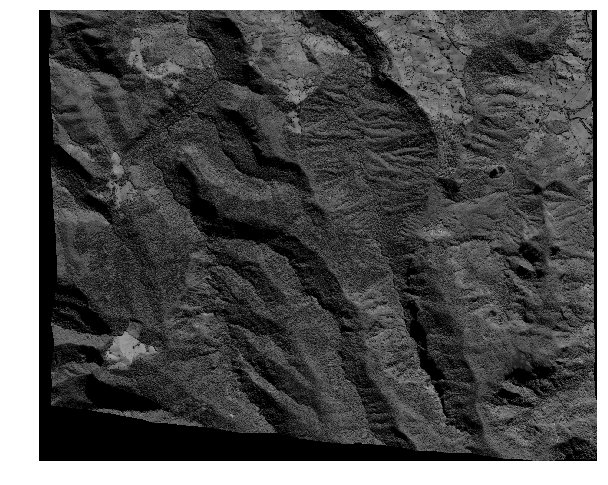

In [65]:
img_swir2.plot()

In [47]:
img_swir2.shape

(8, 2929, 1843)

In [73]:
bb = [153.09762104342795, -28.243627935598276, 153.22548206570607, -28.140393627369745]
img_vnir2 = CatalogImage('104001003EAC0500', bbox=bb)

In [74]:
img_vnir2.shape

(8, 7964, 9864)

In [75]:
swir_1 = img_swir2[3,:,:]
nir = img_vnir2[6,:,:]



In [58]:
from skimage.transform import resize
import numpy as np
nir_rs = resize(nir.astype(np.float), swir_1.shape, order=1, mode='constant', clip=True)

In [59]:
nir_rs.shape

(2929, 1843)

In [60]:
nbdi = (swir_1 - nir_rs)/(swir_1 + nir_rs)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/dask/local.py:255: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)


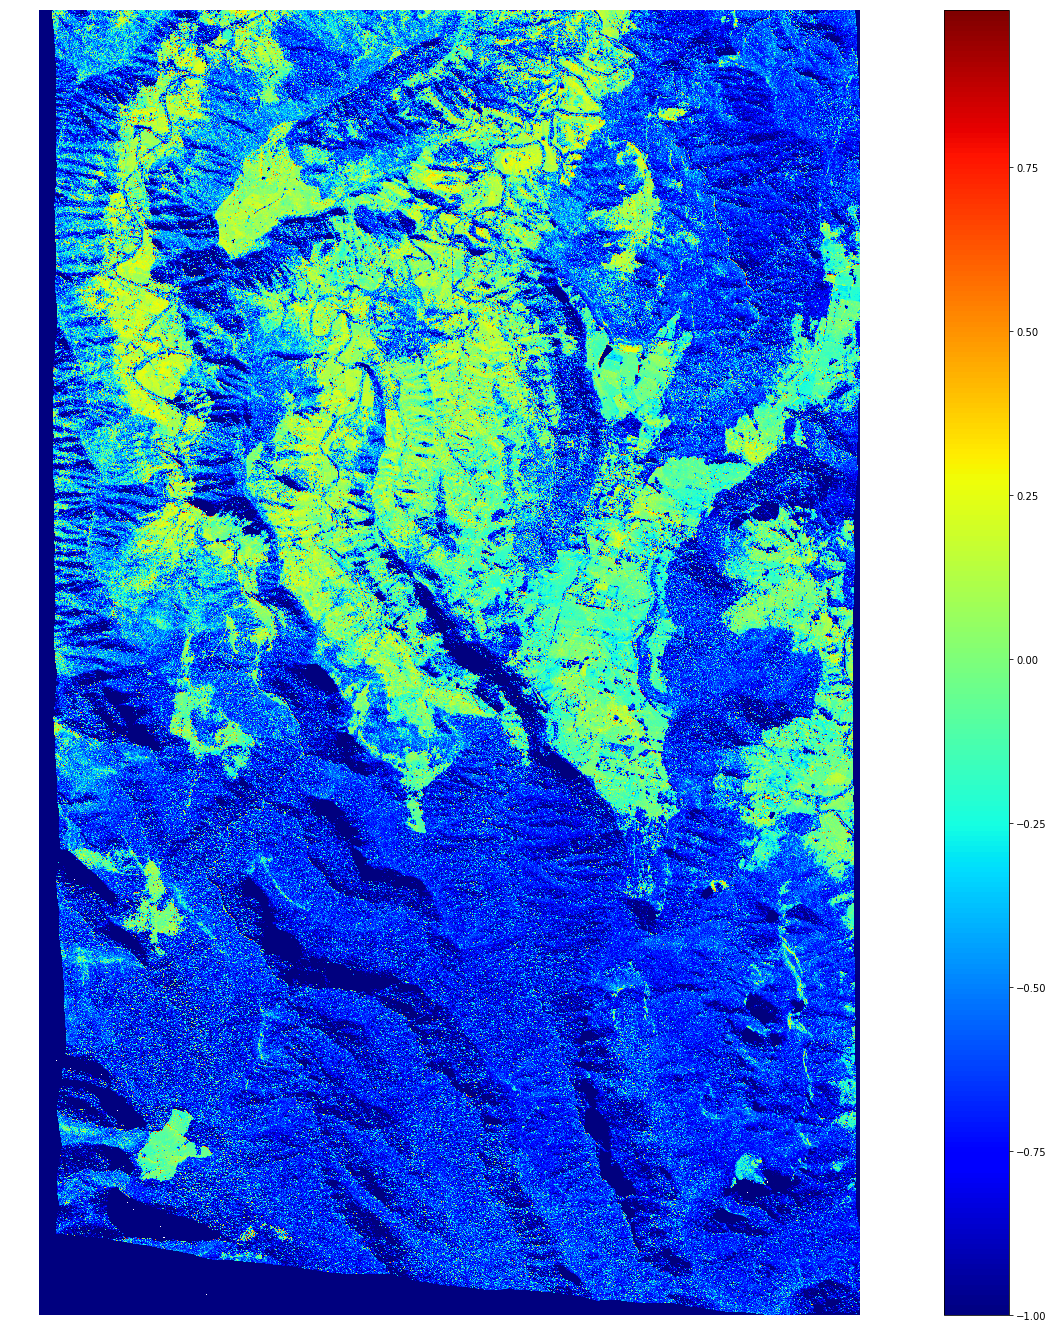

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(image, w=30, h=24, cmap='jet'):
    f, ax = plt.subplots(1, figsize=(w,h))
    ax.axis('off')
    plt.imshow(image, cmap=cmap)
    plt.colorbar()
    plt.show()

plot(nbdi)

In [67]:
# Very Near InfraRed
#  Short Wavelength InfraRed 

# The definition of spectral regions varies between fields and can be debated.
# For these purposes, the following definitions are used:
# XX = Atmospherically opaque region
#
#|---------------VNIR------------------|
#|                    |-----------------------IR-------------------------|
#|----- VIS ----------|-RE-|----NIR----|--SWIR---|XX|-SWIR-|XXXX|--SWIR--|
#|   C  B    G  Y  R    RE   N1     N2   S1          S2/3/4      S5/6/7/8|
#| 0.4 | 0.5 | 0.6 | 0.7 | 0.8 | 0.9 | 1.0 | 1.3 | 1.5 | 1.8 | 2.0 | 2.5 |

# WorldView-3
# PAN     1574.41 1578.28 1583.58

# COASTAL 1757.89 1743.9  1743.81
# BLUE    2004.61 1974.53 1971.48
# GREEN   1830.18 1858.1  1856.26
# YELLOW  1712.07 1748.87 1749.4
# RED     1535.33 1550.58 1555.11
# REDEDGE 1348.08 1303.4  1343.95
# NIR1    1055.94 1063.92 1071.98
# NIR2    858.77  858.632 863.296

# SWIR 1  479.019 478.873 494.595
# SWIR 2  263.797 257.55  261.494
# SWIR 3  225.283 221.448 230.518
# SWIR 4  197.552 191.583 196.766
# SWIR 5  90.4178 86.5651 80.365
# SWIR 6  85.0642 82.0035 74.7211
# SWIR 7  76.9507 74.7411 69.043
# SWIR 8  68.0988 66.3906 59.8224

#  0.0161 * ((R672/(R550*R708)) ** 0.7784)
#v7/(s0*v7)

# 0.0337 * (R672/R550) ** 1.8695
#v7/s0

#0.08 * ((R850-R2218)/(R850-R1928)) - 0.052
#v7-v1/v7

#0.045 * ((R850-R1718)/(R850-R1928)) - 0.014
#v7-v0/v7-v1

def calc_ecarr(nir2,swir1):
    ecarr = 0.0161 * ((nir2/(swir1*nir2)) ** 0.7784)
    return(ecarr)


In [76]:
# get bands we need
swir1 = img_swir2[0,:,:]
nir2 = img_vnir2[7,:,:]

In [77]:
swir1.shape

(1488, 1843)

In [78]:
nir2.shape

(7964, 9864)

In [ ]:
from skimage.transform import resize
import numpy as np
nir2_rs = resize(nir2.astype(np.float), swir1.shape, order=1, mode='constant', clip=True)

In [ ]:



ec = calc_ecarr(nir2_rs,swir1)

In [ ]:
plot(ec)

In [ ]:
ec.shape